<h1 align=center> TERCERA PARTE DEL PROYECTO: EDA </h1>

<p align="center">
<img src="src/EDA_logo.png"  height=100>
</p>

El EDA se utiliza principalmente para ver qué datos pueden revelarse más allá de la tarea de modelado formal o las pruebas de hipótesis, y permite conocer mejor las variables de conjunto de datos y las relaciones entre ellas. <span style="color:yellow">[1]</span>

---

<h3 align=center> Recursos </h3>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

<h3 align=center> Data </h3>

In [48]:
df_data = pd.read_csv('data/data.csv')
df_data.head()

,id,title,type,duration,duration_type,duration_int,director,cast,country,date_added,release_year,rating,listed_in,description,score
0,as1,the grand seduction,movie,113 min,min,113.0,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,3.467131
1,as2,take care good night,movie,110 min,min,110.0,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,3.548682
2,as3,secrets of deception,movie,74 min,min,74.0,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,3.500000
3,as4,pink: staying true,movie,69 min,min,69.0,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",3.538055
4,as5,monster maker,movie,45 min,min,45.0,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,3.478992


In [49]:
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [50]:
df_ratings.rename(columns={'movieId': 'id'}, inplace=True)

In [51]:
df_ratings.head()

,userId,rating,timestamp,id
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


---

<h3 align=center> Verificación de registros duplicados </h3>

Verificación de registros duplicados en `df_data`:

In [52]:
df_data.duplicated().sum()

0

No hay registros duplicados en este DtaFrame

Verificación de registros duplicados en `df_rating`:

In [53]:
duplicated_ratings = df_ratings.duplicated().sum()
count_ratings = df_ratings.shape[0]

print(duplicated_ratings)
print(count_ratings)

percent_duplicated_ratings = duplicated_ratings * 100 / count_ratings

print('Porcentaje de valores duplicados:', percent_duplicated_ratings)


124
11024289
Porcentaje de valores duplicados: 0.0011247890907068927


Hay un procentaje muy pequeño de valores duplicados. Hay un 0,001 porciento de valores duplicados, este es un porcentaje muy pequeño y se procede a eliminarlos de la siguiente forma:

In [54]:
df_ratings.drop_duplicates(inplace=True)
print(df_ratings.shape[0])

11024165


In [55]:
df_ratings['userId'].duplicated().sum()

10909088

In [56]:
print('Hay ' + str(len(df_ratings['userId'].unique())) + ' usuarios únicos')

Hay 115077 usuarios únicos


---

<h3 align=center> Verificación de registros duplicados en el campo id </h3>

In [57]:
# df_data
print('Total de resgitros en el DataFrame df_data:', df_data.shape[0])
print('Total de valores únicos en la columna id de df_data:', len(df_data['id'].unique()))


Total de resgitros en el DataFrame df_data: 22998
Total de valores únicos en la columna id de df_data: 22998


No hay valores duplicados de este campo

---

<h3 align=center> Imputación de valores faltantes </h3>

In [58]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   title          22998 non-null  object 
 2   type           22998 non-null  object 
 3   duration       22516 non-null  object 
 4   duration_type  22516 non-null  object 
 5   duration_int   22516 non-null  float64
 6   director       14739 non-null  object 
 7   cast           17677 non-null  object 
 8   country        11499 non-null  object 
 9   date_added     13356 non-null  object 
 10  release_year   22998 non-null  int64  
 11  rating         22998 non-null  object 
 12  listed_in      22998 non-null  object 
 13  description    22994 non-null  object 
 14  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 2.6+ MB


También podemos ver los valores faltantes en cada una de las columnas utilizando Seaborn de la siguiente forma:

<AxesSubplot: >

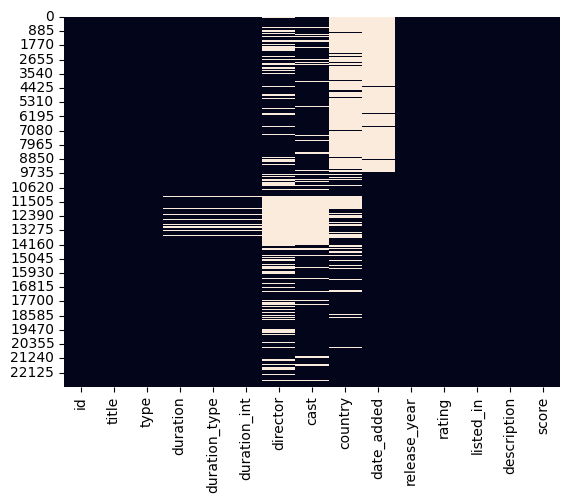

In [59]:
sns.heatmap(df_data.isnull(), cbar=False)

In [60]:
df_data.isnull().sum()

id                   0
title                0
type                 0
duration           482
duration_type      482
duration_int       482
director          8259
cast              5321
country          11499
date_added        9642
release_year         0
rating               0
listed_in            0
description          4
score                0
dtype: int64

Las columnas con mayor cantidad de datos faltantes son: `director`, `cast`, `country`, `date_added`. Hay varias opciones para imputar los valores faltantes en estas columnas cualitativaa, una de ellas es buscar datasets nuevos, por ejemplo buscar algún dataset en donde aparezcan los nombres de los directores y sus correspondientes películas y realizar un _join_ con la data que ya tenemos disponible. ESto se puede realizar con cada una de las columnas faltantes.

Debido a que los porcentajes de valores faltantes en estás columnas son muy grandes se toma la decisión de eliminarlas, debido a que no va a formar parte del modelo. Sin embargo es importante destacar que algunas de estas columnas pueden ser importantes a la hora de estudiar la preferencia de los usuarios por una determinada película o serie y crear un buen sistema de recomendación.

Propuesta de mejora: Imputar los valores faltantes utilizando otros datasets obtenidos de fuentes externas.

In [61]:
df_data.drop(['director', 'cast', 'country', 'date_added'], axis=1, inplace=True)

La columma duration se separó en dos columnas que aportan la misma información, por lo tanto puede ser eliminada:

In [62]:
df_data.drop(['duration'], axis=1, inplace=True)

In [63]:
df_data.head()

,id,title,type,duration_type,duration_int,release_year,rating,listed_in,description,score
0,as1,the grand seduction,movie,min,113.0,2014,g,"comedy, drama",a small fishing village must procure a local d...,3.467131
1,as2,take care good night,movie,min,110.0,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,3.548682
2,as3,secrets of deception,movie,min,74.0,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,3.500000
3,as4,pink: staying true,movie,min,69.0,2014,g,documentary,"pink breaks the mold once again, bringing her ...",3.538055
4,as5,monster maker,movie,min,45.0,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,3.478992


In [64]:
print('Cantidad de valores faltantes en las columnas duration_type y duration_int:')
print(len(df_data[df_data['duration_type'].isnull()]))
df_data[df_data['duration_type'].isnull()].index

Cantidad de valores faltantes en las columnas duration_type y duration_int:
482


Int64Index([11118, 11130, 11133, 11155, 11158, 11168, 11173, 11174, 11175,
            11177,
            ...
            14026, 14044, 14069, 14073, 14076, 14077, 14111, 19732, 19985,
            20004],
           dtype='int64', length=482)

In [65]:
print(df_data.shape[0])

22998


In [66]:
print('porcentaje de valores faltantes en las columnas duration_type y duration_int: ')
print(len(df_data[df_data['duration_type'].isnull()]) * 100 / df_data.shape[0])

porcentaje de valores faltantes en las columnas duration_type y duration_int: 
2.095834420384381


Únicamente el 2% de los registros en estas columnas son nulos, por lo que se procede a eliminarlos para no tomarlos en cuenta en el modelo:

In [67]:
df_data.drop(df_data[df_data['duration_type'].isnull()].index, inplace=True)

Ahora comprobamos que efectivamente las filas con los valores nulos fueron eliminadas:

In [68]:
print(df_data['duration_int'].isnull().sum())
print(df_data['duration_type'].isnull().sum())

0
0


In [69]:
df_data.isnull().sum()

id               0
title            0
type             0
duration_type    0
duration_int     0
release_year     0
rating           0
listed_in        0
description      1
score            0
dtype: int64

In [72]:
df_data.drop(df_data[df_data['description'].isnull()].index, inplace=True)

In [73]:
df_data.isnull().sum()

id               0
title            0
type             0
duration_type    0
duration_int     0
release_year     0
rating           0
listed_in        0
description      0
score            0
dtype: int64

Valores faltantes en el DataFrame `df_ratings`:

In [70]:
df_ratings.isnull().sum()

userId       0
rating       0
timestamp    0
id           0
dtype: int64

---

<h3 align=center> Visualización de Outliers </h3>

Visualizamos los outliers en la columna `score` del DataFrame `df_data`:

In [71]:
df_data.head()

,id,title,type,duration_type,duration_int,release_year,rating,listed_in,description,score
0,as1,the grand seduction,movie,min,113.0,2014,g,"comedy, drama",a small fishing village must procure a local d...,3.467131
1,as2,take care good night,movie,min,110.0,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,3.548682
2,as3,secrets of deception,movie,min,74.0,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,3.500000
3,as4,pink: staying true,movie,min,69.0,2014,g,documentary,"pink breaks the mold once again, bringing her ...",3.538055
4,as5,monster maker,movie,min,45.0,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,3.478992


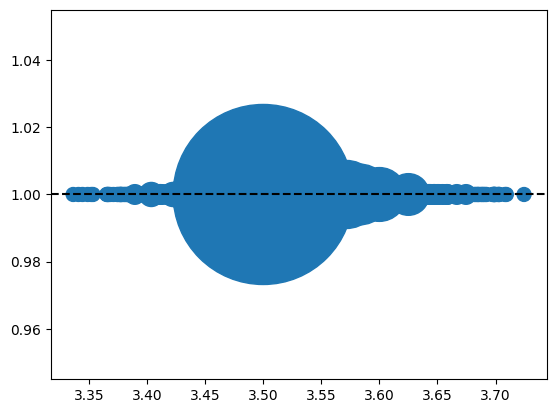

In [78]:
score = df_data['score'].to_numpy()
score_unique, counts = np.unique(score, return_counts=True)
sizes = counts * 100

plt.axhline(1, color='k', linestyle='--')
plt.scatter(score_unique, np.ones(len(score_unique)), s=sizes)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5a46698e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5a46699360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5a46698b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5a466998a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a46699b40>],
 'means': []}

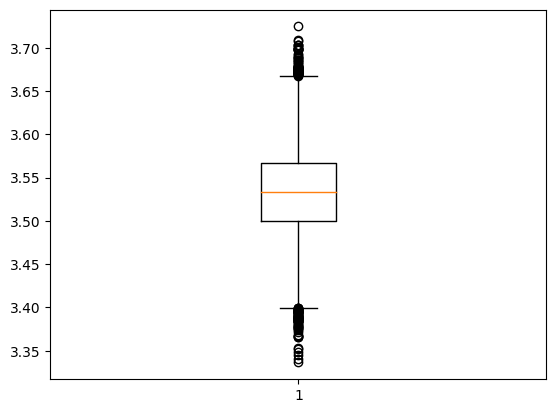

In [79]:
plt.boxplot(score)

---

<h3 align=center> Carga de los datos que serán utilizados en el modelo de recomendación </h3>

In [80]:
df1 = df_ratings[['id', 'userId', 'rating']]
df2 = df_data[['id', 'title']]


df = pd.merge(df1, df2, on='id')
df.head()

,id,userId,rating,title
0,as680,1,1.0,the english civil war
1,as680,583,4.5,the english civil war
2,as680,765,5.0,the english civil war
3,as680,2116,3.0,the english civil war
4,as680,2143,3.0,the english civil war


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792583 entries, 0 to 10792582
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      object 
 1   userId  int64  
 2   rating  float64
 3   title   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 411.7+ MB


In [82]:
df.to_csv('data/data_ML.csv', encoding='utf-8', index=False)

---

<h3 align=center> Referencias </h3>

[1] https://www.ibm.com/es-es/cloud/learn/exploratory-data-analysis